# Importing Libraries

In [3]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [4]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [7]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [8]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [10]:
start_date=datetime.datetime(2023,12,1)
enddate=datetime.datetime.today()

In [11]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [12]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [13]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [14]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [15]:
realized_pnl_time=pd.DataFrame()
for key in profit_and_loss:

    temp=profit_and_loss[key]
    realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)

realized_pnl_time.columns=realized_pnl_time.columns+'USDT'

realized_pnl_time=realized_pnl_time.sort_index().fillna(0)
realized_pnl_time.index=realized_pnl_time.index.strftime(date_format='%Y-%m-%d')
realized_pnl_time.groupby(realized_pnl_time.index).sum()
realized_pnl_time=realized_pnl_time.cumsum()
realized_pnl_time = realized_pnl_time[~realized_pnl_time.index.duplicated(keep='last')]
realized_pnl_time=realized_pnl_time.sum(axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2268\1326421339.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)


In [16]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [17]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [18]:
holding=Binance.get_inventory()

In [19]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,4581.633087,0.9999,-131.886217,2396.70,2264.813783
OMUSDT,526.319895,2793.154976,0.6096,0.000000,2266.84,2266.840000
BTCUSDT,601.021649,852.669630,0.1861,3.537078,251.65,255.187078
SOLUSDT,281.200518,343.138420,0.0749,0.000000,61.94,61.940000
JASMYUSDT,387.458505,279.780763,0.0611,0.000000,-107.68,-107.680000
ETHUSDT,250.747339,181.016409,0.0395,0.000000,-69.73,-69.730000
TRXUSDT,76.868953,111.542243,0.0243,-10.723889,34.67,23.946111
BBUSDT,60.176053,19.347707,0.0042,-39.733101,-40.83,-80.563101
BNBUSDT,1.142121,0.982938,0.0002,-10.606040,-0.16,-10.766040
PEPEUSDT,0.000004,0.000002,0.0000,-38.521986,-0.00,-38.521986


In [20]:
days=(enddate-start_date).days
remaining=days%500
numbers_of_table=days//500
remaining

434

In [21]:
# data1=Binance.get_price(tickers,start_date)
# data2=Binance.get_price(tickers,enddate)
# data=data1.combine_first(data2)
# data.index=pd.to_datetime(data.index)
# #data=data.dropna(axis=1)
# n=len(data.columns)
# data=data.sort_index()

In [22]:
temp_end=start_date
prices=pd.DataFrame()
for i in range(numbers_of_table+1):
    temp_data=Binance.get_price(tickers,temp_end)
    temp_end=temp_end+datetime.timedelta(500)
    prices=prices.combine_first(temp_data)
    
temp_end=temp_end+datetime.timedelta(500)
last_data=Binance.get_price(tickers,temp_end)
data=prices.combine_first(last_data)
data=data.sort_index()
data = data[~data.index.duplicated(keep='first')]

In [23]:
data.index=pd.to_datetime(data.index)
n=len(data.columns)
data=data.sort_index()

In [24]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [25]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [26]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [28]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [29]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [30]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])
price_pnl.index=pd.to_datetime(price_pnl.index)

In [31]:
daily_book_cost=book_cost.resample("D").last().dropna().sort_index()

In [32]:
book_cost_history=pd.DataFrame()
book_cost_history.index=set(daily_book_cost.index.append(quantities.index))

book_cost_history=book_cost_history.sort_index()

for col in quantities:
    
    book_cost_history[col]=daily_book_cost[col]

book_cost_history=book_cost_history.ffill()
book_cost_history=book_cost_history.loc[quantities.index]

In [33]:
# pnl_history=pd.DataFrame()
# pnl_history.index=quantities.index
# pnl_history=pnl_history.sort_index()

# for col in quantities:
#     pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

# pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [34]:
# pnl_history['Total']

In [35]:
#pnl_history['Total']-pnl_history['Total'].shift(1)

In [36]:
realized_pnl_time2=pd.DataFrame()

realized_pnl_time2.index=quantities.index
realized_pnl_time2=realized_pnl_time2.sort_index()

realized_pnl_time2.index=realized_pnl_time2.index.strftime(date_format='%Y-%m-%d')

    
realized_pnl_time2=pd.concat([realized_pnl_time2,realized_pnl_time])

realized_pnl_time2=realized_pnl_time2.sort_index().fillna(0)
realized_pnl_time2.index=pd.to_datetime(realized_pnl_time2.index)
realized_pnl_time2.groupby(realized_pnl_time2.index).sum()

realized_pnl_time2 = realized_pnl_time2[~realized_pnl_time2.index.duplicated(keep='first')]

realized_pnl_time2.columns=['Realized PnL']

In [37]:
realized_pnl_time2=realized_pnl_time2.fillna(0)

In [38]:
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()

for col in quantities:
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

pnl_history['Total']=pnl_history.sum(axis=1)+realized_pnl_time2['Realized PnL'].loc[quantities.index].cumsum().shift(-1).fillna(0)

In [39]:
pnl_history['Total']

2024-09-23    -242.846960
2024-09-24    -351.229838
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-02-02    1872.990523
2025-02-03    2467.233102
2025-02-04    2239.692343
2025-02-05    2199.786173
2025-02-06    2328.430768
Name: Total, Length: 137, dtype: float64

In [40]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24   -108.382879
2024-09-25    -11.102127
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-02-02   -248.982664
2025-02-03    594.242579
2025-02-04   -227.540759
2025-02-05    -39.906169
2025-02-06    128.644595
Name: Total, Length: 137, dtype: float64

In [41]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [42]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [43]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [44]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\Admin\AppData\Local\Temp\ipykernel_2268\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [45]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [46]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [47]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

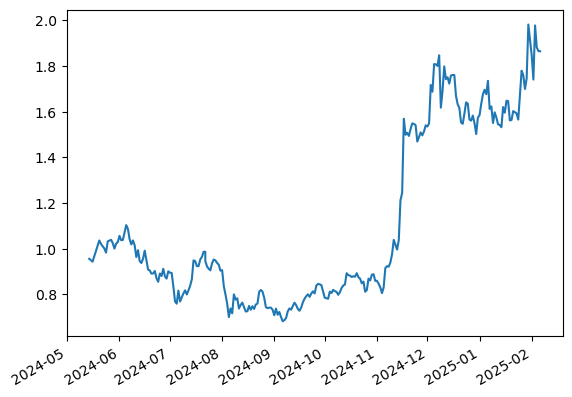

In [48]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [50]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [53]:
days=0
historical_risk=RiskAnalysis(returns_to_use.iloc[-days:])
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[-days:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [54]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [57]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.5340
BNBUSDT,0.1469
XRPUSDT,0.1418
DEXEUSDT,0.0704
SUIUSDT,0.0433
PEPEUSDT,0.0398
RAYUSDT,0.0095
AAVEUSDT,0.0090
TRXUSDT,0.0049
ADAUSDT,0.0004


In [58]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.484916
BTCUSDT,0.300000
XRPUSDT,0.092310
DEXEUSDT,0.061755
BNBUSDT,0.029022
SUIUSDT,0.026261
TRXUSDT,0.003739
PEPEUSDT,0.001997


### Current results

In [60]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [61]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
OMUSDT,0.582499
BTCUSDT,0.311777
TRXUSDT,0.105724


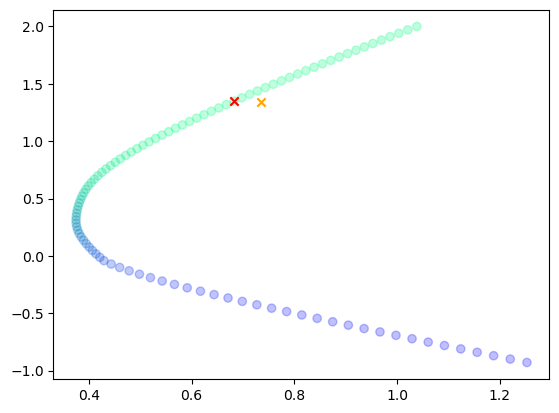

In [62]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [64]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison=current_holding_comparison.round(7)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2793.154976,0.609642,0.582499,0.027143
BTCUSDT,852.669630,0.186106,0.311777,-0.125671
SOLUSDT,343.138420,0.074894,0.000000,0.074894
JASMYUSDT,279.780763,0.061066,0.000000,0.061066
ETHUSDT,181.016409,0.039509,0.000000,0.039509
TRXUSDT,111.542243,0.024345,0.105724,-0.081379
BBUSDT,19.347707,0.004223,0.000000,0.004223
BNBUSDT,0.982938,0.000215,0.000000,0.000215
PEPEUSDT,0.000002,0.000000,0.000000,0.000000


In [65]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison=historical_comparison.fillna(0)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison=historical_comparison.round(7)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2793.154976,0.609642,0.484916,0.124726
BTCUSDT,852.669630,0.186106,0.300000,-0.113894
SOLUSDT,343.138420,0.074894,0.000000,0.074894
JASMYUSDT,279.780763,0.061066,0.000000,0.061066
ETHUSDT,181.016409,0.039509,0.000000,0.039509
TRXUSDT,111.542243,0.024345,0.003739,0.020606
BBUSDT,19.347707,0.004223,0.000000,0.004223
BNBUSDT,0.982938,0.000215,0.029022,-0.028807
PEPEUSDT,0.000002,0.000000,0.001997,-0.001997
XRPUSDT,0.000000,0.000000,0.092310,-0.092310


# Risk Reward Analysis

In [67]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [68]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

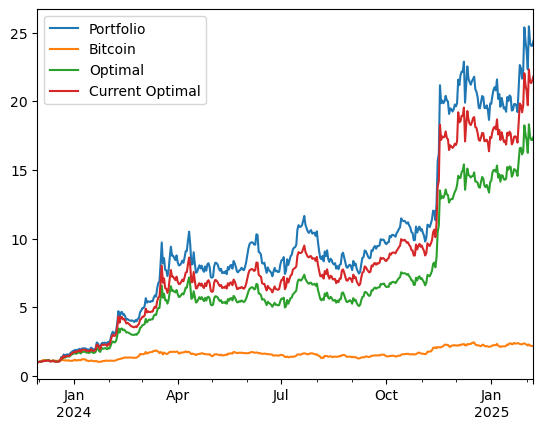

In [69]:
days=0
(1+portfolio_perf.iloc[-days:]).cumprod().plot()

In [70]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

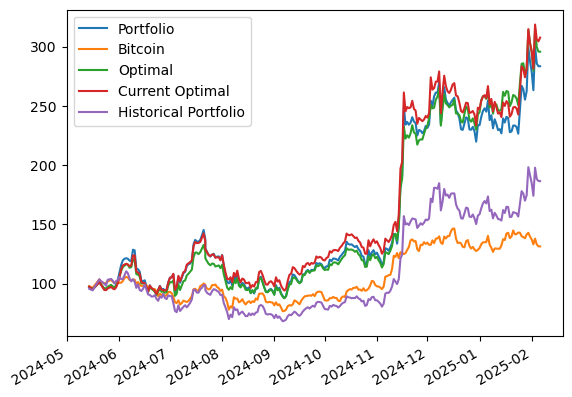

In [71]:
days=0
((1+current_perf.iloc[-days:]).cumprod()*100).plot()

In [72]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-28,255.155514,138.244001,277.598988,274.012401,169.963707
2025-01-29,262.279765,141.476921,280.952040,281.046177,174.562610
2025-01-30,299.090375,142.820328,313.887649,314.672165,198.187203
2025-01-31,287.485435,139.657879,302.920011,302.577046,191.324410
2025-02-01,278.585120,137.190295,295.273640,296.103766,184.686080
2025-02-02,263.149028,133.129604,279.544907,281.416615,174.094032
2025-02-03,300.073497,137.983551,315.137267,318.539171,197.785838
2025-02-04,285.688332,133.040925,299.454298,305.941167,188.190244
2025-02-05,283.361461,131.465707,295.725781,304.362358,186.561035
2025-02-06,283.362441,131.386650,295.608259,307.501820,186.471769


## Volatilities

In [74]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.707921
 dtype: float64,
 0.7087130619490234)

In [75]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.734532
 dtype: float64,
 0.7345317558483745)

In [76]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.846613
Bitcoin            0.426405
Optimal            0.708713
Current Optimal    0.790026
dtype: float64

In [77]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4691269523120408

In [78]:
days=90
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

2.816715964348239

In [79]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.8278378434968554

## Risk Contribution

In [81]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,0.031968,0.029022,0.001647,0.007654,0.000370,0.007285
BTCUSDT,0.355290,0.300000,0.017699,0.099231,0.032580,0.066651
DEXEUSDT,0.121041,0.061755,0.004937,0.032695,0.006563,0.026132
OMUSDT,35.321015,0.484916,0.967103,0.809310,0.718870,0.090440
PEPEUSDT,0.002559,0.001997,0.000123,0.001236,0.000012,0.001224
SUIUSDT,0.035075,0.026261,0.001657,0.012355,0.001251,0.011103
TRXUSDT,0.002215,0.003739,0.000161,0.000835,0.000013,0.000822
XRPUSDT,0.154748,0.092310,0.006673,0.036684,0.007785,0.028899


In [82]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.334889,0.582499,0.833987,0.863963,0.785826,0.078137
BTCUSDT,0.126234,0.311777,0.125213,0.091870,0.033824,0.058045
TRXUSDT,0.036999,0.105724,0.040800,0.044168,0.016224,0.027944


In [83]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.469822,0.616162,0.875669,0.846279,0.758927,0.087352
BTCUSDT,0.077705,0.191919,0.076508,0.054750,0.011062,0.043688
SOLUSDT,0.001885,0.070707,0.020599,0.036008,0.004131,0.031877
JASMYUSDT,-0.022453,0.060606,0.010826,0.043514,0.008446,0.035068
ETHUSDT,-0.009885,0.040404,0.008660,0.013231,0.000905,0.012326
TRXUSDT,0.007070,0.020202,0.007739,0.006218,0.000511,0.005707


# Value At Risk

## Historical

### Optimal Weights

In [87]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.05295012185019941, -0.08004836428805068)

### Current Weights

In [89]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.05054609371937704, -0.07665252000027627)

In [90]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [91]:
var=historical_var.iloc[row]
var

OMUSDT      -0.030483
BTCUSDT     -0.006012
SOLUSDT     -0.002626
JASMYUSDT   -0.008437
ETHUSDT     -0.001147
TRXUSDT     -0.001167
BBUSDT      -0.000000
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.049872
Name: 2025-01-19 00:00:00, dtype: float64

In [92]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.058368
BTCUSDT     -0.005134
SOLUSDT     -0.003722
JASMYUSDT   -0.005262
ETHUSDT     -0.001696
TRXUSDT     -0.000685
BBUSDT       0.000000
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.074867
dtype: float64

## Parametric

### Optimal Weights

In [95]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.0734340403007411, -0.09412213627787483)

### Current Weights

In [97]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.07610927109598475, -0.0975510424970271)

## Multivariate

### Optimal Weights

In [100]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06516843048024215, -0.08429535705007853)

### Current Weights

In [102]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.07232370815221813, -0.0913256292266823)

In [103]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.059237
BTCUSDT     -0.003990
SOLUSDT     -0.002831
JASMYUSDT   -0.003228
ETHUSDT     -0.001031
TRXUSDT     -0.000602
Portfolio   -0.070919
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [107]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06657414386186049, -0.0850640400649043)

### Current Weights

In [109]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07184424802278903, -0.08983247845506821)

In [110]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.060362
BTCUSDT     -0.003182
SOLUSDT     -0.002446
JASMYUSDT   -0.003308
ETHUSDT     -0.000911
TRXUSDT     -0.000473
Portfolio   -0.070682
dtype: float64

## Student Copula

### Optimal Weights

In [113]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06633164422362166, -0.0851151751982255)

### Current Weights

In [115]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07112035142443539, -0.09097505052111103)

In [116]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.060767
BTCUSDT     -0.004199
SOLUSDT     -0.002744
JASMYUSDT   -0.002945
ETHUSDT     -0.001072
TRXUSDT     -0.000284
Portfolio   -0.072012
dtype: float64

## Gumbel Copula

### Optimal Weights

In [119]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.1351278909672748, -0.18897527952550627)

### Current Weights

In [121]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.14707930714856896, -0.2090055705869756)

In [122]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.141429
BTCUSDT     -0.001168
SOLUSDT      0.000154
JASMYUSDT   -0.000778
ETHUSDT     -0.000034
TRXUSDT     -0.000053
Portfolio   -0.143310
dtype: float64

## Monte Carlo

### Optimal

In [125]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [126]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.0739909926973442, -0.09297409927975561)

### Current Weights

In [128]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07738782546640673, -0.09585865128920287)

In [129]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.063915
BTCUSDT     -0.004864
SOLUSDT     -0.002941
JASMYUSDT   -0.004064
ETHUSDT     -0.001200
TRXUSDT     -0.000650
Portfolio   -0.077634
dtype: float64

## VaR Violation

In [131]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.061009,-0.110021,-0.092695,-0.021465
2024-01-15,-0.061009,-0.110007,-0.092056,0.015809
2024-01-16,-0.061009,-0.110293,-0.090746,0.055244
2024-01-17,-0.061009,-0.112525,-0.095107,-0.034817
2024-01-18,-0.061009,-0.114696,-0.098583,-0.035235
...,...,...,...,...
2025-02-03,-0.056133,-0.103898,-0.093166,0.127323
2025-02-04,-0.056133,-0.106550,-0.096969,-0.049766
2025-02-05,-0.056133,-0.106285,-0.103404,-0.012451
2025-02-06,-0.052253,-0.102768,-0.091333,-0.000397


In [132]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.041622,-0.083741,-0.083833,-0.015499
2024-05-29,-0.041622,-0.081536,-0.076556,-0.007480
2024-05-30,-0.041622,-0.071392,-0.070652,0.027986
2024-05-31,-0.041622,-0.074499,-0.072283,0.045160
2024-06-01,-0.041622,-0.079969,-0.071806,0.061577
...,...,...,...,...
2025-02-03,-0.053084,-0.147796,-0.128743,0.140318
2025-02-04,-0.054363,-0.153157,-0.135175,-0.047939
2025-02-05,-0.054363,-0.153846,-0.137820,-0.008145
2025-02-06,-0.054363,-0.153850,-0.139628,0.000003


<Axes: >

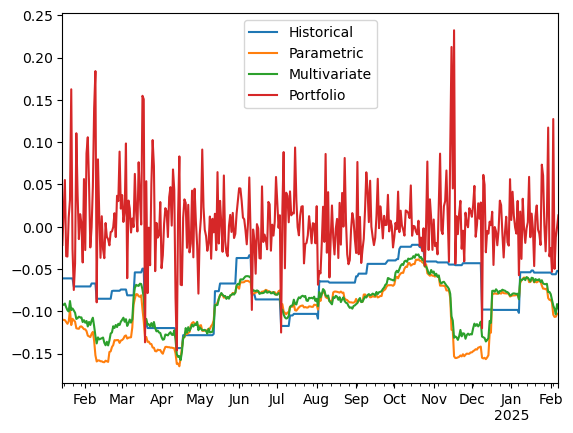

In [133]:
var_data.plot()

<Axes: >

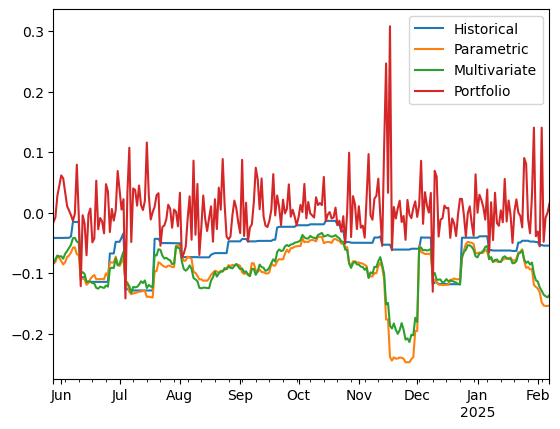

In [134]:
current_var_data.plot()

In [135]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.023018,0.007673,0.007673
Kupiec Stat,7.433333,22.580495,22.580495
P-value,0.006403,0.000002,0.000002


In [136]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.058594,0.015625,0.011719
Kupiec Stat,0.378113,8.609442,11.284704
P-value,0.538615,0.003344,0.000781


# Principal Component Analysis

## Historical PCA

In [139]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.78612513, 0.06727188, 0.05742116, 0.04970616, 0.03947567])

In [140]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT    0.015884
ADAUSDT     0.015870
ALGOUSDT    0.018241
APTUSDT     0.016477
ARBUSDT     0.017605
              ...   
WBTCUSDT    0.009022
WLDUSDT     0.022225
XLMUSDT     0.013195
XRPUSDT     0.011399
XTZUSDT     0.016389
Name: PC1, Length: 62, dtype: float64

<Axes: >

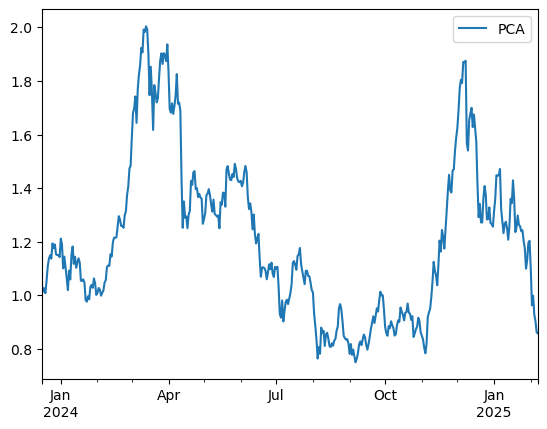

In [141]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

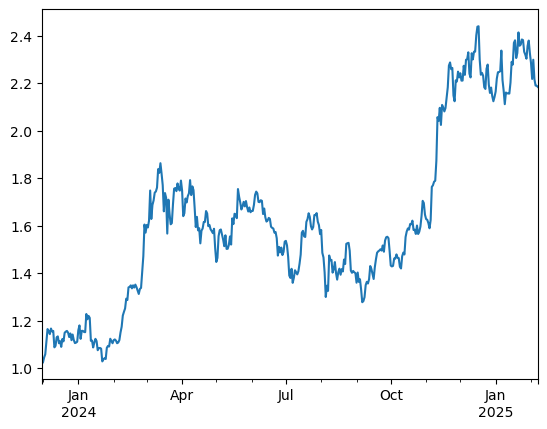

In [142]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [143]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
FLOWUSDT     0.425380
WBETHUSDT    0.444537
ETHUSDT      0.444707
ATOMUSDT     0.464448
DOTUSDT      0.465645
ETCUSDT      0.470192
NEXOUSDT     0.479474
ADAUSDT      0.506720
EOSUSDT      0.526485
WBTCUSDT     0.526515
BTCUSDT      0.527121
AVAXUSDT     0.529889
IOTAUSDT     0.554930
FILUSDT      0.563205
ARBUSDT      0.572218
GRTUSDT      0.580644
XTZUSDT      0.585447
LINKUSDT     0.598274
SOLUSDT      0.605518
dtype: float64

<Axes: >

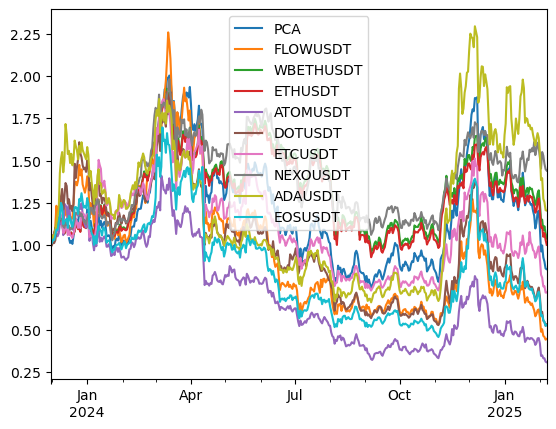

In [144]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

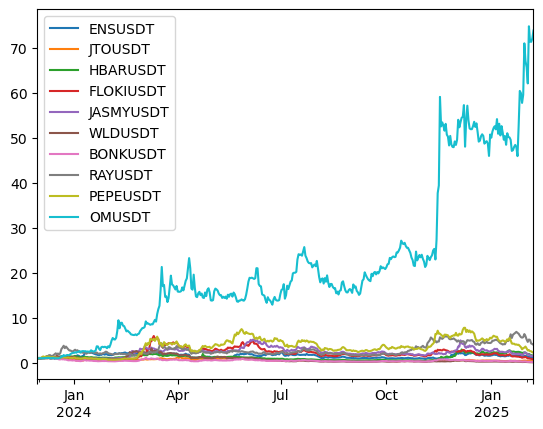

In [145]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [147]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.56904243, 0.14719999, 0.11842171, 0.09480635, 0.07052952])

In [148]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.095616
BTCUSDT      0.059168
SOLUSDT      0.097826
JASMYUSDT    0.176341
ETHUSDT      0.084494
TRXUSDT      0.055308
BBUSDT       0.206155
BNBUSDT      0.065282
PEPEUSDT     0.159810
Name: PC1, dtype: float64

<Axes: >

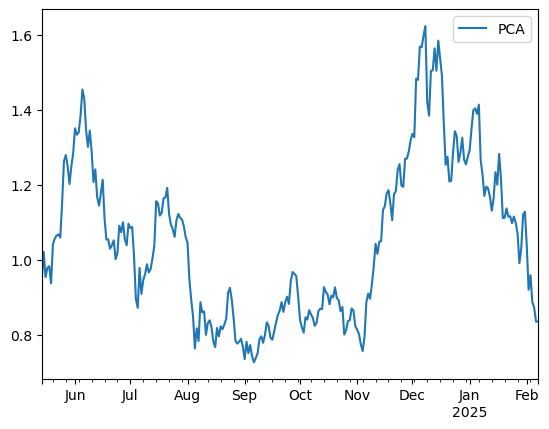

In [149]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

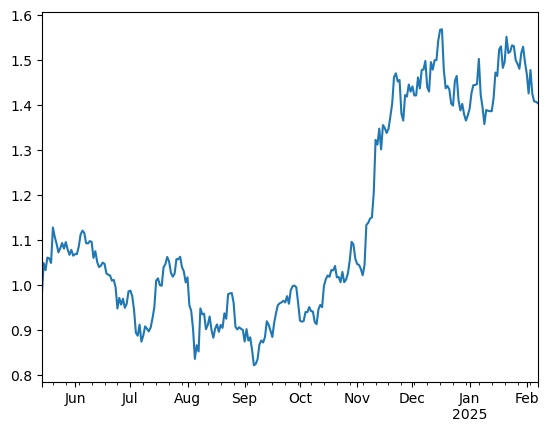

In [150]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [151]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
ETHUSDT      0.436073
BNBUSDT      0.469043
BTCUSDT      0.491410
SOLUSDT      0.492769
JASMYUSDT    0.692356
PEPEUSDT     0.745196
BBUSDT       0.776157
TRXUSDT      0.905909
OMUSDT       0.975203
dtype: float64

<Axes: >

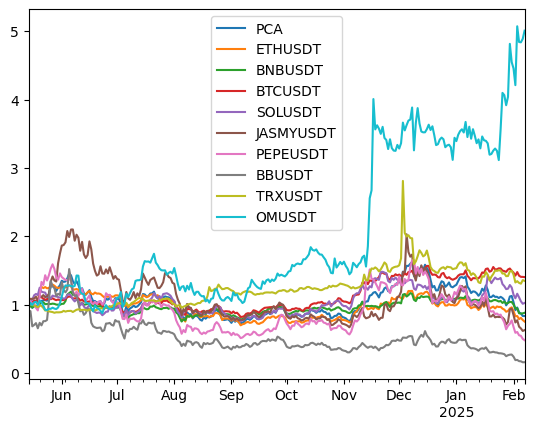

In [152]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [154]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.908754
BBUSDT       1.578185
JASMYUSDT    1.344417
SOLUSDT      1.166381
BTCUSDT      1.000000
ETHUSDT      0.972203
OMUSDT       0.894448
BNBUSDT      0.667425
TRXUSDT      0.328038
Name: BTCUSDT, dtype: float64

In [155]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.473787
PEPEUSDT     2.188229
BBUSDT       1.917058
SOLUSDT      1.475397
OMUSDT       1.232614
ETHUSDT      1.119321
TRXUSDT      1.035434
BTCUSDT      1.000000
BNBUSDT      0.746236
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [157]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [158]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
BTCUSDT,0.357885
BBUSDT,0.290609
TRXUSDT,0.152673
PEPEUSDT,0.129150
ETHUSDT,0.096199
SOLUSDT,0.090394
JASMYUSDT,0.072774
BNBUSDT,0.024803
OMUSDT,0.020856


### Regression to PCA

In [160]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-30:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

0.6792967415930864

In [161]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.307496
BNBUSDT      1.187497
ETHUSDT      1.025667
PCA          1.000000
SOLUSDT      0.758774
JASMYUSDT    0.440736
PEPEUSDT     0.419541
BBUSDT       0.387033
TRXUSDT      0.262050
OMUSDT       0.245535
dtype: float64

In [162]:
reg=ex_ante_perf.copy().dropna().iloc[-30:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.820301
BNBUSDT      1.736429
ETHUSDT      1.212064
TRXUSDT      1.079274
PCA          1.000000
BBUSDT       0.723431
PEPEUSDT     0.644025
JASMYUSDT    0.517260
SOLUSDT      0.457678
OMUSDT       0.311267
dtype: float64

### Correlation Matrix

<Axes: >

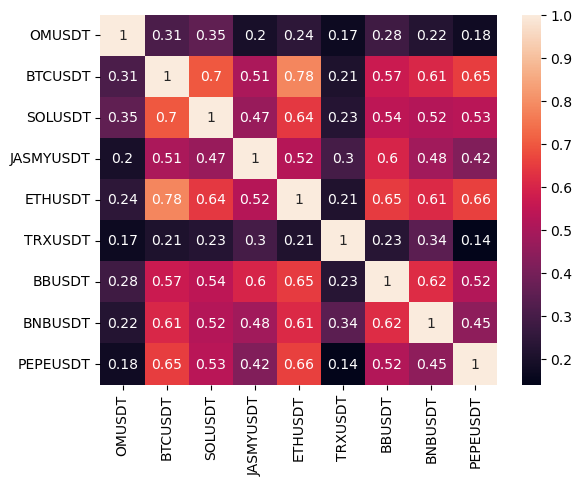

In [164]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

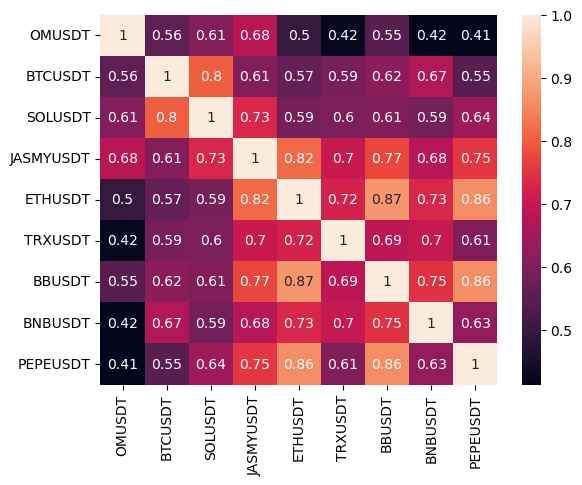

In [165]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [167]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,SOLUSDT,JASMYUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.000000,0.150852,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414563,0.112009,0.000000,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [168]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-07-02,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.373221,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-08-01,0.362287,0.037742,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.280655,0.0
2024-08-31,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-09-30,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.115763,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-10-30,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.626272,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-11-29,0.000000,0.041966,0.010478,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.085417,0.311399,0.0
2024-12-29,0.649342,0.066837,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.021261,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2025-01-28,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.516388,0.0
2025-02-07,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [169]:
rolling_optimization.iloc[-1].sort_values(ascending=False)[:6]

OMUSDT      1.0
AAVEUSDT    0.0
SHIBUSDT    0.0
LINKUSDT    0.0
LTCUSDT     0.0
MKRUSDT     0.0
Name: 2025-02-07 00:00:00, dtype: float64